In [61]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import itertools    


In [62]:
df_away=pd.read_csv('./data/Train_Data/train_away_team_statistics_df.csv').drop(['LEAGUE', 'TEAM_NAME'], axis=1)
df_home=pd.read_csv('./data/Train_Data/train_home_team_statistics_df.csv').drop(['LEAGUE', 'TEAM_NAME'], axis=1)
df_home.columns = [('HOME_' +str(col) ) if col != 'ID' else 'ID' for col in df_home.columns ]


In [63]:
df_home.head()

,ID,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
0,0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,3.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,6.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,2.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,2.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,4,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [64]:
df_joined=df_away.join(df_home.set_index('ID'), on='ID')
df_joined=df_joined.fillna(0.0)
df_final=df_joined.sort_values(by=['ID'])


In [65]:
df_joined.head()

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
0,0,4.0,1.0,4.0,1.0,5.0,4.0,3.0,6.0,4.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,4.0,3.0,4.0,3.0,8.0,8.0,7.0,8.0,5.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,4.0,3.0,4.0,2.0,6.0,4.0,4.0,1.0,6.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,0.0,0.0,0.0,0.0,1.0,3.0,3.0,8.0,1.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,0.0,6.0
4,4,5.0,4.0,5.0,6.0,5.0,6.0,6.0,4.0,5.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [66]:
df_result=pd.read_csv('./data/Train_Data/Y_train.csv')


In [67]:
df_result.head()

,ID,HOME_WINS,DRAW,AWAY_WINS
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,3,1,0,0
4,4,0,1,0


In [68]:
df_result.loc[df_result['DRAW'] == 1, 'result'] = 0
df_result.loc[df_result['AWAY_WINS'] == 1 , 'result'] = -1
df_result.loc[df_result['HOME_WINS'] == 1 , 'result'] = 1
df_result['result'] = df_result['result'].astype('int')


In [69]:
df_result_final=df_result.sort_values(by=['ID']).iloc[:,[4]]

In [70]:
df_result_final.head()

,result
0,-1
1,0
2,-1
3,1
4,0


In [71]:
from sklearn.model_selection import train_test_split

attribut_train,attribut_test,result_train,result_test=train_test_split(df_final, df_result_final, test_size=0.,random_state=10)


In [72]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=3000,solver='lbfgs',C=0.0001).fit(attribut_train, result_train)

D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
yhat = LR.predict(attribut_test)


In [74]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(result_test,yhat),4)


0.4817

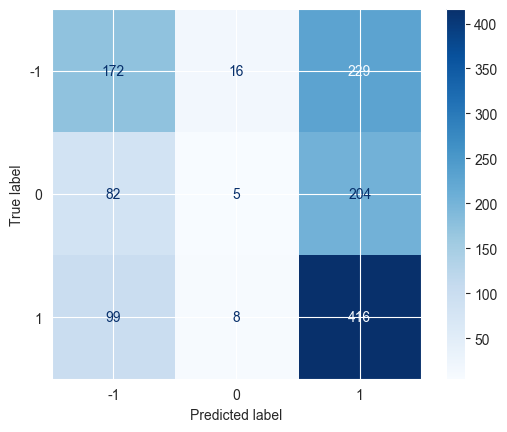

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(result_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[-1, 0, 1],)
disp.plot(cmap="Blues")

In [76]:
df_away_test=pd.read_csv('./data/Test_Data/test_away_team_statistics_df.csv')
df_home_test=pd.read_csv('./data/Test_Data/test_home_team_statistics_df.csv')
df_home_test.columns = [('HOME_' +str(col) ) if col != 'ID' else 'ID' for col in df_home_test.columns ]


In [77]:
df_joined_test=df_away_test.join(df_home_test.set_index('ID'), on='ID')
df_joined_test=df_joined_test.fillna(0.0)
df_final_test=df_joined_test.sort_values(by=['ID'])

In [78]:
df_final_test

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
0,12303,6.0,6.0,5.0,7.0,7.0,4.0,3.0,6.0,3.0,...,2.0,9.0,0.0,10.0,0.0,4.0,4.0,6.0,2.0,3.0
1,12304,4.0,4.0,4.0,4.0,3.0,8.0,8.0,4.0,7.0,...,9.0,10.0,3.0,1.0,8.0,3.0,8.0,1.0,0.0,2.0
2,12305,1.0,1.0,2.0,2.0,2.0,6.0,5.0,4.0,2.0,...,6.0,8.0,2.0,9.0,0.0,6.0,0.0,9.0,0.0,0.0
3,12306,6.0,9.0,6.0,9.0,4.0,4.0,4.0,1.0,10.0,...,4.0,5.0,2.0,3.0,8.0,0.0,2.0,2.0,2.0,3.0
4,12307,5.0,5.0,2.0,4.0,4.0,1.0,2.0,3.0,8.0,...,5.0,0.0,0.0,7.0,5.0,0.0,1.0,6.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25363,37666,8.0,8.0,6.0,10.0,7.0,8.0,8.0,10.0,3.0,...,2.0,6.0,2.0,1.0,5.0,6.0,6.0,5.0,2.0,0.0
25364,37667,7.0,4.0,4.0,9.0,8.0,7.0,6.0,3.0,9.0,...,3.0,0.0,2.0,8.0,0.0,0.0,4.0,8.0,10.0,10.0
25365,37668,3.0,4.0,2.0,3.0,1.0,1.0,1.0,3.0,4.0,...,7.0,0.0,8.0,4.0,0.0,7.0,0.0,2.0,0.0,3.0
25366,37669,5.0,5.0,5.0,3.0,4.0,3.0,3.0,3.0,5.0,...,5.0,0.0,4.0,7.0,8.0,5.0,6.0,4.0,5.0,4.0


In [79]:
yhat_test = LR.predict(df_final_test)
y_pred_test=pd.DataFrame(yhat_test)
y_pred_test.columns=['prediction']

In [80]:
y_pred_test.loc[y_pred_test['prediction'] == 1, 'HOME_WINS'] = 1
y_pred_test.loc[y_pred_test['prediction'] == 0 , 'DRAW'] = 1

y_pred_test.loc[y_pred_test['prediction'] == -1 , 'AWAY_WINS'] = 1

y_pred_test=y_pred_test.fillna(0)
y_pred_test['HOME_WINS'] = y_pred_test['HOME_WINS'].astype('int')
y_pred_test['DRAW'] = y_pred_test['DRAW'].astype('int')
y_pred_test['AWAY_WINS'] = y_pred_test['AWAY_WINS'].astype('int')
y_pred_test=y_pred_test.drop(['prediction'], axis=1)

In [81]:
y_pred_test

,HOME_WINS,DRAW,AWAY_WINS
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
25363,0,1,0
25364,1,0,0
25365,1,0,0
25366,1,0,0


In [82]:
test_prediction=pd.concat([df_final_test['ID'],y_pred_test], axis=1)

In [85]:
test_prediction.to_csv('./submission/logistic_benchmark_submission.csv', index=False)